In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


In [2]:
data=pd.read_csv("Data_Cortex_Nuclear.csv")
data

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [3]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [5]:
data.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

# Imputation of missing values

In [6]:
column_names=([ 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N',])

In [7]:
#Using KNN Imputer
imputer = KNNImputer()

imputed_data= imputer.fit_transform(data.select_dtypes(include=[float]))

new_data = pd.DataFrame(imputed_data,columns=column_names)


In [8]:
new_data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425748,0.617108,0.319081,2.296808,3.842120,0.233203,0.181889,3.536089,0.212607,1.428245,...,0.226676,0.158982,0.135911,0.121521,0.131062,0.446073,0.170584,0.186913,0.205282,1.337784
std,0.249021,0.251290,0.049315,0.346925,0.932441,0.041582,0.027017,1.293514,0.032548,0.466334,...,0.028989,0.028976,0.026775,0.014276,0.023552,0.066432,0.061670,0.039641,0.052186,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.155615,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.206395,0.137601,0.116994,0.110839,0.113975,0.398082,0.129641,0.158294,0.167794,1.081423
50%,0.366540,0.566365,0.316633,2.295648,3.738908,0.231246,0.182472,3.325505,0.210681,1.355423,...,0.224000,0.153270,0.131295,0.121626,0.126491,0.448459,0.158033,0.179938,0.195513,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197444,4.480652,0.234558,1.560931,...,0.241655,0.175990,0.149191,0.131955,0.143555,0.490773,0.194654,0.210119,0.234146,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [9]:
new_data.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 77, dtype: int64

# Treatment of Outliers

In [10]:
def cap_floor_outliers(new_data, factor=1.5):
    for col in new_data.select_dtypes(include=[np.number]).columns:
        Q1 = new_data[col].quantile(0.25)
        Q3 = new_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        new_data[col] = np.where(new_data[col] < lower_bound, lower_bound, new_data[col])
        new_data[col] = np.where(new_data[col] > upper_bound, upper_bound, new_data[col])
    return new_data

new_data1 = cap_floor_outliers(new_data.copy())

In [11]:
new_data1.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.405842,0.600474,0.318919,2.296254,3.838026,0.232947,0.181815,3.536089,0.212596,1.390344,...,0.226055,0.158788,0.135261,0.121537,0.130662,0.445759,0.166901,0.186427,0.204521,1.337784
std,0.154569,0.175675,0.048339,0.344867,0.918417,0.039051,0.025655,1.293514,0.032452,0.293383,...,0.027038,0.028389,0.024848,0.014222,0.022164,0.065287,0.048956,0.038142,0.049947,0.317126
min,0.145327,0.245359,0.197068,1.355829,1.737540,0.128715,0.115380,1.343998,0.125233,0.674577,...,0.155869,0.088305,0.080657,0.079164,0.085419,0.259046,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.155615,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.206395,0.137601,0.116994,0.110839,0.113975,0.398082,0.129641,0.158294,0.167794,1.081423
50%,0.366540,0.566365,0.316633,2.295648,3.738908,0.231246,0.182472,3.325505,0.210681,1.355423,...,0.224000,0.153270,0.131295,0.121626,0.126491,0.448459,0.158033,0.179938,0.195513,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197444,4.480652,0.234558,1.560931,...,0.241655,0.175990,0.149191,0.131955,0.143555,0.490773,0.194654,0.210119,0.234146,1.585824
max,0.786690,1.033248,0.438622,3.231358,6.329345,0.334330,0.246682,7.464070,0.300153,2.092742,...,0.294545,0.233573,0.197486,0.158748,0.187925,0.629809,0.292173,0.287857,0.333672,2.129791


# Scaling

In [12]:
#Using standard scaler with mean 0 and standard deviation 1
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
new_data2= scale.fit_transform(new_data1)
new_data2= pd.DataFrame(new_data2,columns=column_names)

In [13]:
new_data2.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,...,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03
mean,1.842148e-16,-1.184238e-16,3.947460e-17,-5.000116e-16,1.315820e-17,-9.868649e-17,-7.894919e-16,1.315820e-17,1.973730e-16,5.296175e-16,...,3.848773e-16,-6.184353e-16,-1.052656e-16,1.532930e-15,-2.467162e-16,1.578984e-16,7.894919e-17,-7.500173e-16,1.842148e-16,-1.052656e-16
std,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,...,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00
min,-1.686210e+00,-2.022366e+00,-2.521930e+00,-2.728182e+00,-2.288133e+00,-2.670368e+00,-2.590733e+00,-1.695464e+00,-2.693306e+00,-2.440833e+00,...,-2.597048e+00,-2.483905e+00,-2.198568e+00,-2.980888e+00,-2.042255e+00,-2.861182e+00,-1.782234e+00,-2.121721e+00,-2.057811e+00,-2.370201e+00
25%,-7.616897e-01,-7.221495e-01,-6.471552e-01,-6.878336e-01,-7.433743e-01,-6.949537e-01,-6.706014e-01,-8.169354e-01,-6.710969e-01,-6.273036e-01,...,-7.274552e-01,-7.466499e-01,-7.355003e-01,-7.526248e-01,-7.532431e-01,-7.305974e-01,-7.614546e-01,-7.379123e-01,-7.356477e-01,-8.087621e-01
50%,-2.543865e-01,-1.942493e-01,-4.730718e-02,-1.758488e-03,-1.079728e-01,-4.357249e-02,2.562749e-02,-1.628750e-01,-5.904831e-02,-1.190827e-01,...,-7.605404e-02,-1.944503e-01,-1.596665e-01,6.259573e-03,-1.882779e-01,4.136675e-02,-1.812336e-01,-1.702150e-01,-1.804251e-01,-6.417740e-02
75%,5.290166e-01,5.525620e-01,6.026943e-01,6.723988e-01,6.395274e-01,6.219893e-01,6.094862e-01,7.305694e-01,6.770422e-01,5.817161e-01,...,5.772512e-01,6.061985e-01,5.608767e-01,7.328839e-01,5.819727e-01,6.897923e-01,5.671475e-01,6.214442e-01,5.933999e-01,7.825111e-01
max,2.465076e+00,2.464629e+00,2.477469e+00,2.712747e+00,2.713880e+00,2.597404e+00,2.529618e+00,3.038083e+00,2.699251e+00,2.395246e+00,...,2.534311e+00,2.635471e+00,2.505442e+00,2.617666e+00,2.584796e+00,2.820377e+00,2.560051e+00,2.660479e+00,2.586971e+00,2.498608e+00


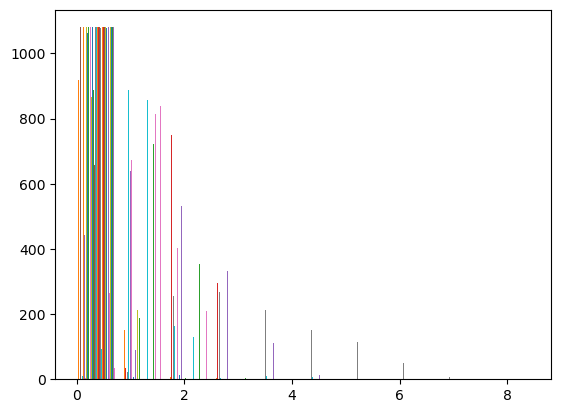

In [14]:
plt.hist(new_data)#dataset that was given
plt.show()

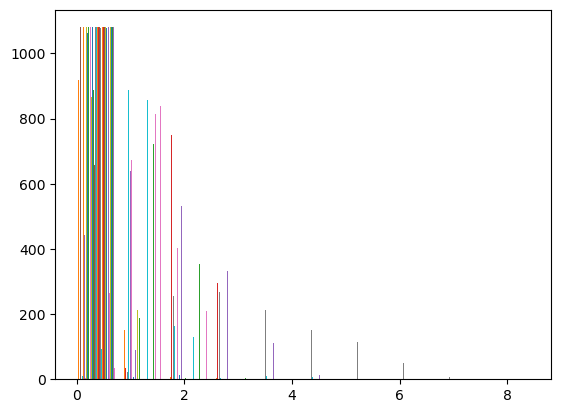

In [15]:
plt.hist(new_data) #data after imputation of missing values
plt.show()

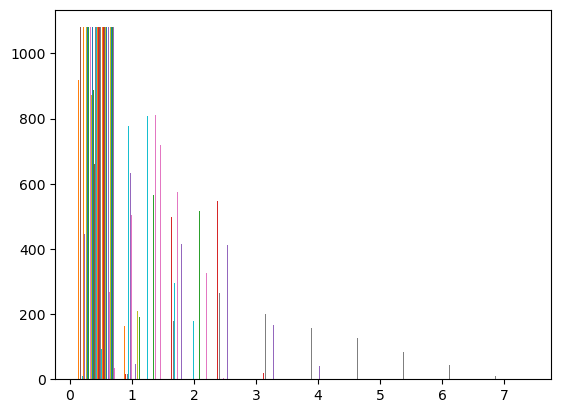

In [16]:
plt.hist(new_data1) #data after outlier detection
plt.show()

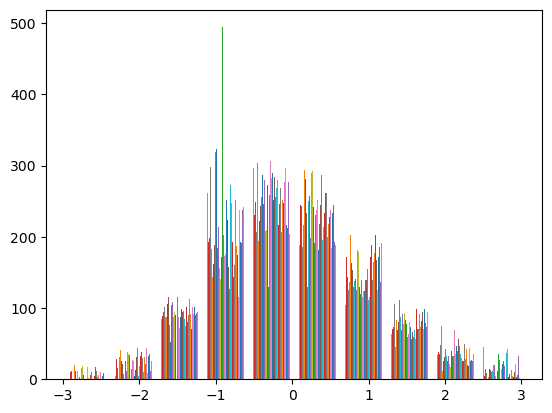

In [17]:
plt.hist(new_data2) #data after feature scaling
plt.show()  #Now data is normally distributed over the range with mean=0 and standard deviation=1

# Encoding Categorical Columns

In [18]:
categorical_cols = data.select_dtypes(exclude=[float]).columns
complete_data = pd.concat([new_data2, data[categorical_cols]], axis=1)
new_data3 = complete_data
final_data = pd.get_dummies(new_data3,columns = ['Genotype', 'Treatment', 'Behavior'])

In [19]:
final_data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3MeK4_N,CaNA_N,MouseID,class,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C
0,0.633032,0.835561,2.302658,1.508742,2.344385,-0.361665,-0.165718,-0.899011,0.605089,1.229652,...,-1.529034,1.065901,309_1,c-CS-m,1,0,1,0,1,0
1,0.704057,0.504515,1.921734,1.430953,2.012014,-0.545969,-0.350893,-0.962120,0.443187,0.702592,...,-1.470282,1.280291,309_2,c-CS-m,1,0,1,0,1,0
2,0.668885,0.739052,2.057059,1.134142,1.943409,-0.613227,-0.237600,-0.968936,0.544142,0.583031,...,-1.544147,1.857038,309_3,c-CS-m,1,0,1,0,1,0
3,0.234727,0.094550,0.821820,0.495183,1.243451,-0.257757,-0.208727,-1.070286,-0.172396,0.698190,...,-1.154153,1.144490,309_4,c-CS-m,1,0,1,0,1,0
4,0.188341,0.096564,0.825460,0.201710,0.959326,-0.508313,-0.319308,-1.084430,-0.630088,0.388362,...,-1.124531,1.583530,309_5,c-CS-m,1,0,1,0,1,0


In [20]:
le = LabelEncoder()
a = new_data3['class']
le.fit(a)

LabelEncoder()

In [21]:
y = le.transform(a)

In [22]:
y

array([0, 0, 0, ..., 7, 7, 7])

In [23]:
y = pd.DataFrame(y, columns = ['class'])
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1075,7
1076,7
1077,7
1078,7


In [24]:
final_data = final_data.drop(columns = 'class')

In [25]:
final_data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,EGR1_N,H3MeK4_N,CaNA_N,MouseID,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C
0,0.633032,0.835561,2.302658,1.508742,2.344385,-0.361665,-0.165718,-0.899011,0.605089,1.229652,...,-1.433115,-1.529034,1.065901,309_1,1,0,1,0,1,0
1,0.704057,0.504515,1.921734,1.430953,2.012014,-0.545969,-0.350893,-0.962120,0.443187,0.702592,...,-1.346217,-1.470282,1.280291,309_2,1,0,1,0,1,0
2,0.668885,0.739052,2.057059,1.134142,1.943409,-0.613227,-0.237600,-0.968936,0.544142,0.583031,...,-1.391887,-1.544147,1.857038,309_3,1,0,1,0,1,0
3,0.234727,0.094550,0.821820,0.495183,1.243451,-0.257757,-0.208727,-1.070286,-0.172396,0.698190,...,-1.022510,-1.154153,1.144490,309_4,1,0,1,0,1,0
4,0.188341,0.096564,0.825460,0.201710,0.959326,-0.508313,-0.319308,-1.084430,-0.630088,0.388362,...,-1.209525,-1.124531,1.583530,309_5,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.977242,-0.779540,-1.325807,-0.592304,-1.348586,-0.543421,-0.411537,-0.813935,-0.162751,-1.133424,...,0.478257,2.479897,0.085303,J3295_11,0,1,0,1,0,1
1076,-0.865023,-0.719335,-1.392509,-0.391241,-1.129133,0.469528,0.026570,-0.791508,0.115388,-1.054382,...,0.366895,1.780990,0.084215,J3295_12,0,1,0,1,0,1
1077,-1.146570,-1.169143,-1.755107,-1.633471,-1.761644,-0.314649,-0.794756,-1.196030,-0.845688,-1.725515,...,1.121747,2.586971,0.293525,J3295_13,0,1,0,1,0,1
1078,-1.194837,-1.068257,-1.551118,-1.218153,-1.583826,-0.616152,-0.319448,-1.121544,-0.633603,-1.595071,...,1.702039,2.586971,0.208996,J3295_14,0,1,0,1,0,1


In [26]:
preprocessed_data = pd.concat([final_data, y], axis=1)

In [27]:
preprocessed_data.head(10)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3MeK4_N,CaNA_N,MouseID,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C,class
0,0.633032,0.835561,2.302658,1.508742,2.344385,-0.361665,-0.165718,-0.899011,0.605089,1.229652,...,-1.529034,1.065901,309_1,1,0,1,0,1,0,0
1,0.704057,0.504515,1.921734,1.430953,2.012014,-0.545969,-0.350893,-0.962120,0.443187,0.702592,...,-1.470282,1.280291,309_2,1,0,1,0,1,0,0
2,0.668885,0.739052,2.057059,1.134142,1.943409,-0.613227,-0.237600,-0.968936,0.544142,0.583031,...,-1.544147,1.857038,309_3,1,0,1,0,1,0,0
3,0.234727,0.094550,0.821820,0.495183,1.243451,-0.257757,-0.208727,-1.070286,-0.172396,0.698190,...,-1.154153,1.144490,309_4,1,0,1,0,1,0,0
4,0.188341,0.096564,0.825460,0.201710,0.959326,-0.508313,-0.319308,-1.084430,-0.630088,0.388362,...,-1.124531,1.583530,309_5,1,0,1,0,1,0,0
5,0.269677,0.157762,1.003161,0.260178,1.056229,-0.368128,-0.217667,-1.078808,-0.536689,0.177509,...,-1.248710,1.509893,309_6,1,0,1,0,1,0,0
6,0.143631,-0.152500,0.492382,0.110151,0.691841,-0.199164,0.085354,-1.178481,-0.518152,0.755992,...,-0.941872,0.601617,309_7,1,0,1,0,1,0,0
7,0.071720,-0.207514,0.181799,-0.104781,0.469186,-0.464038,-0.083715,-1.181906,-0.702673,0.116818,...,-0.903608,0.993360,309_8,1,0,1,0,1,0,0
8,-0.126417,-0.353348,-0.024803,-0.494705,0.246107,-0.659069,-0.547382,-1.295194,-0.983799,-0.438037,...,-0.927119,1.567344,309_9,1,0,1,0,1,0,0
9,-0.161909,-0.576217,0.901210,-0.580165,-0.260829,-0.135730,0.244814,-1.406302,-0.755409,0.081791,...,-0.244116,0.564951,309_10,1,0,1,0,1,0,0


In [28]:
preprocessed_data.to_csv('Preprocessed_data.csv')

# EDA

In [29]:
df = pd.read_csv("Preprocessed_data.csv")

 Histograms

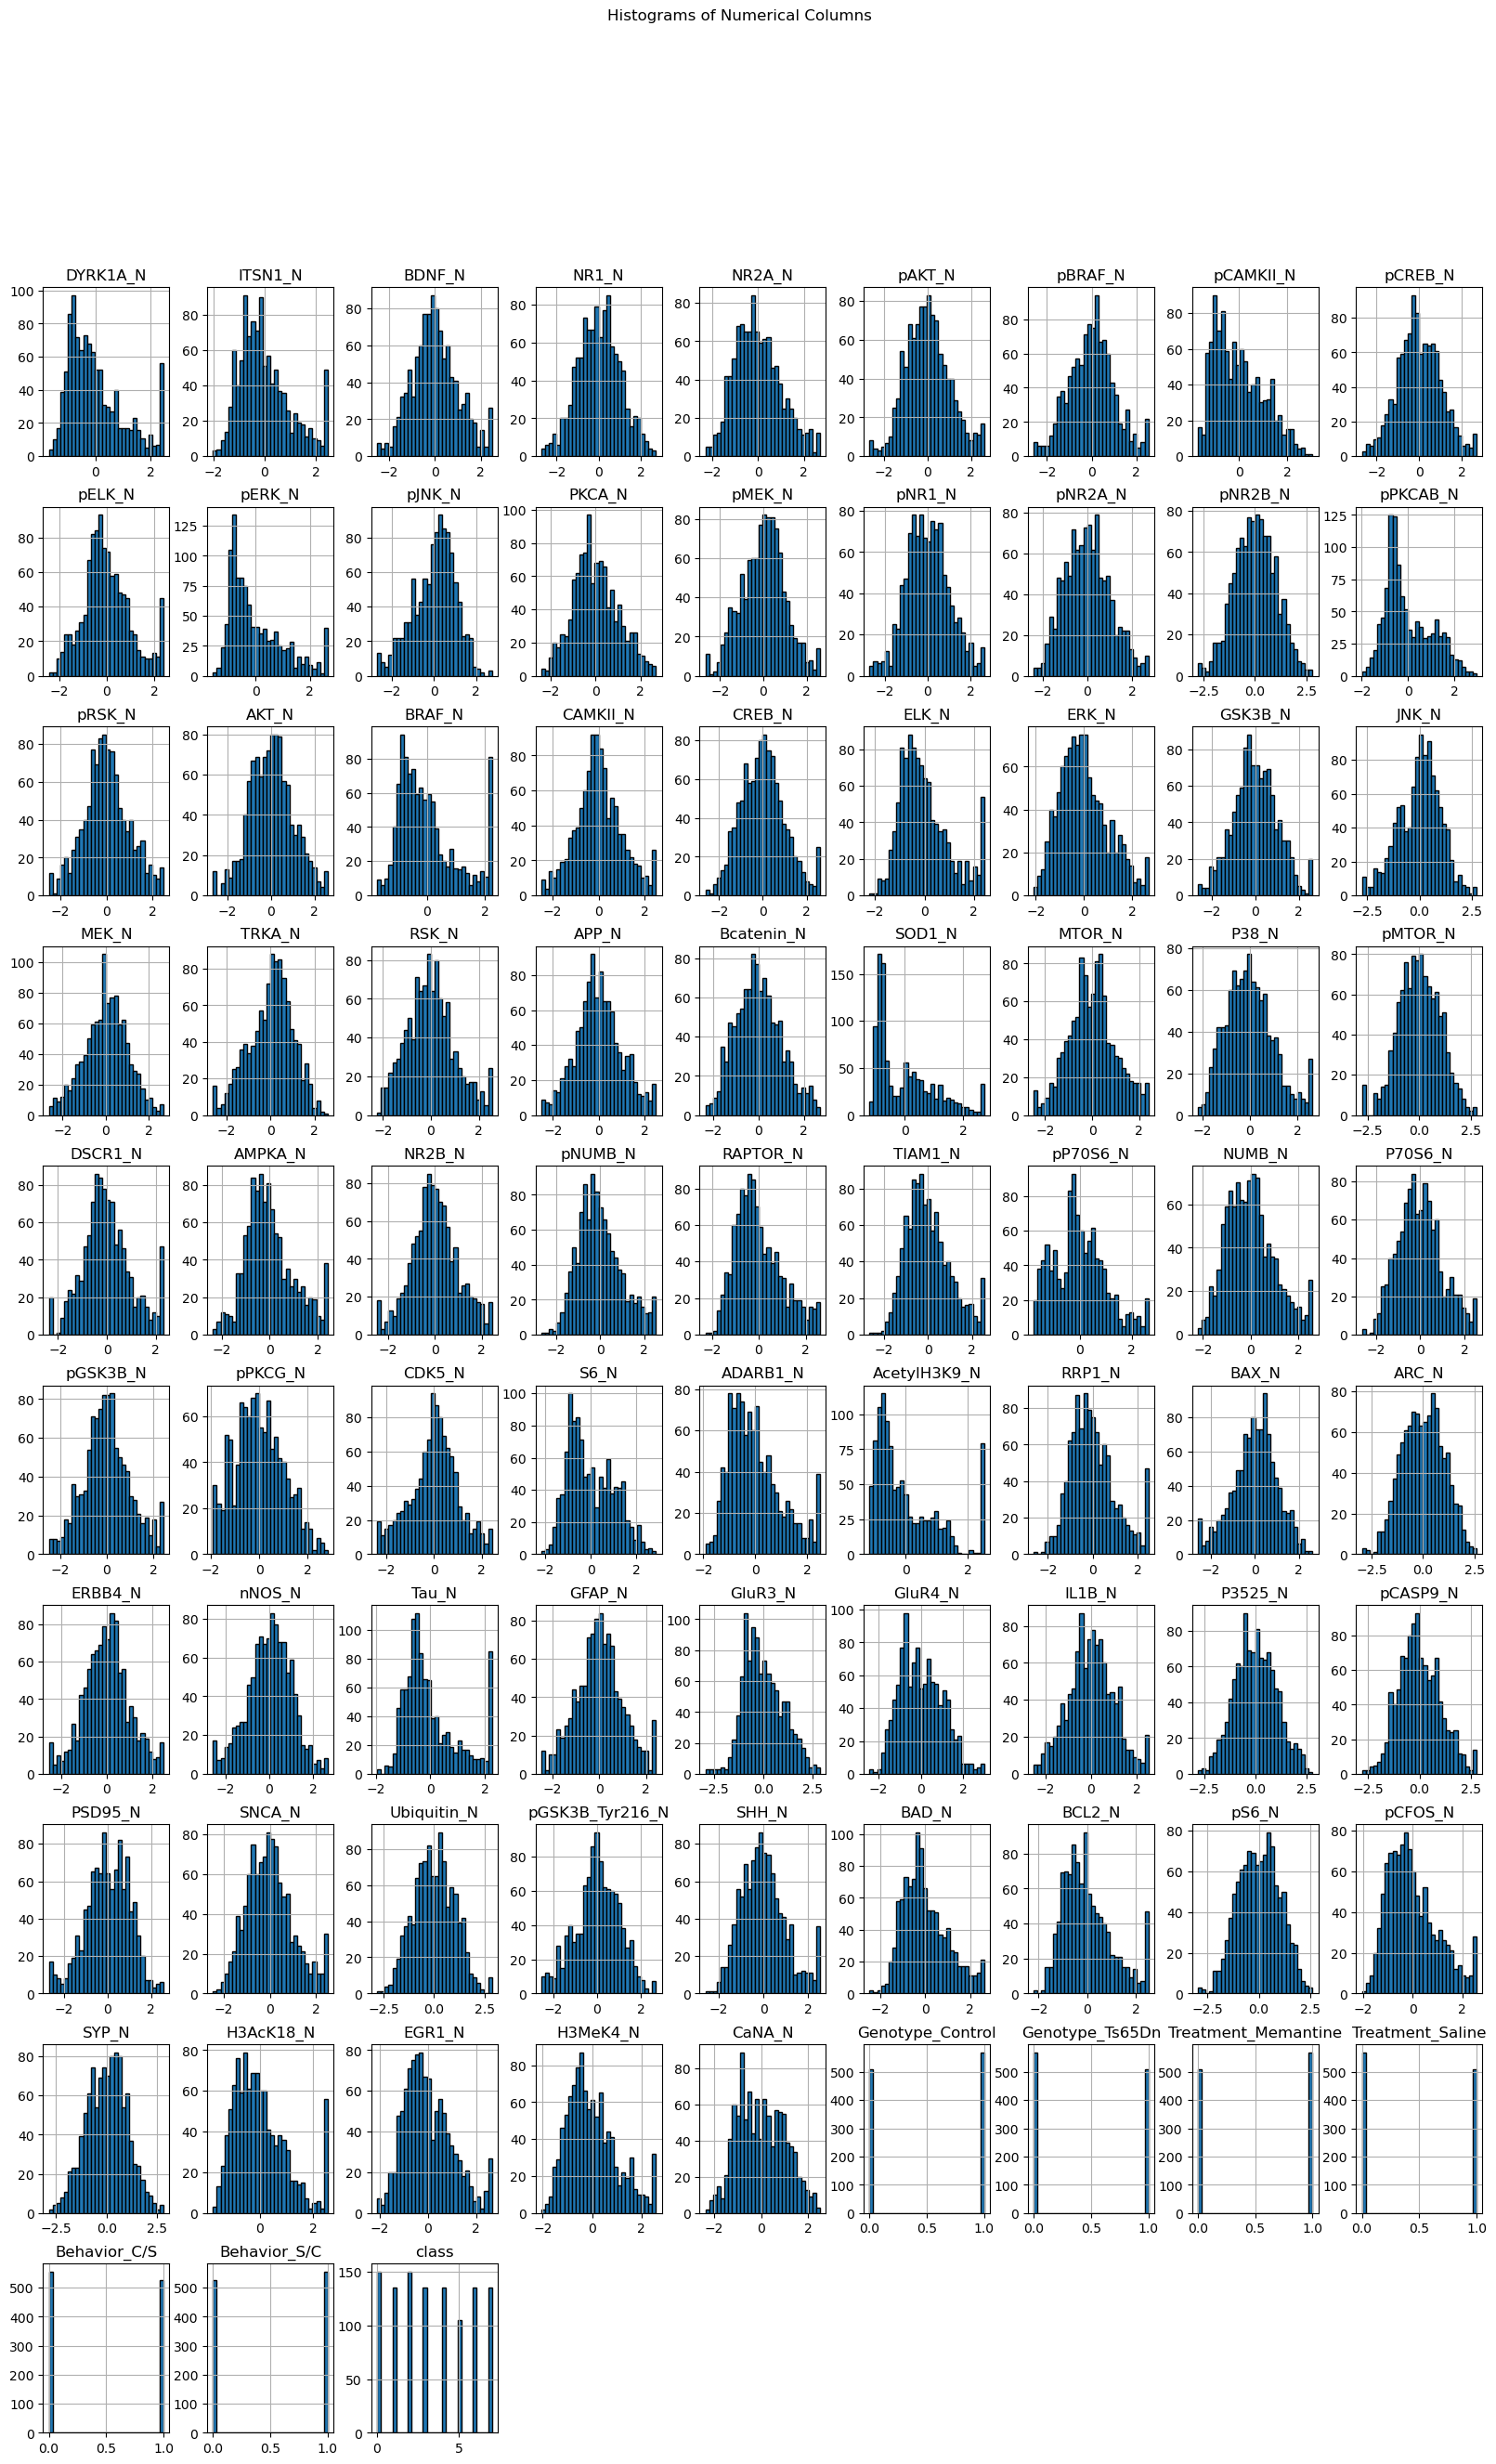

In [30]:
df.hist(figsize=(20, 30), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

Box Plot

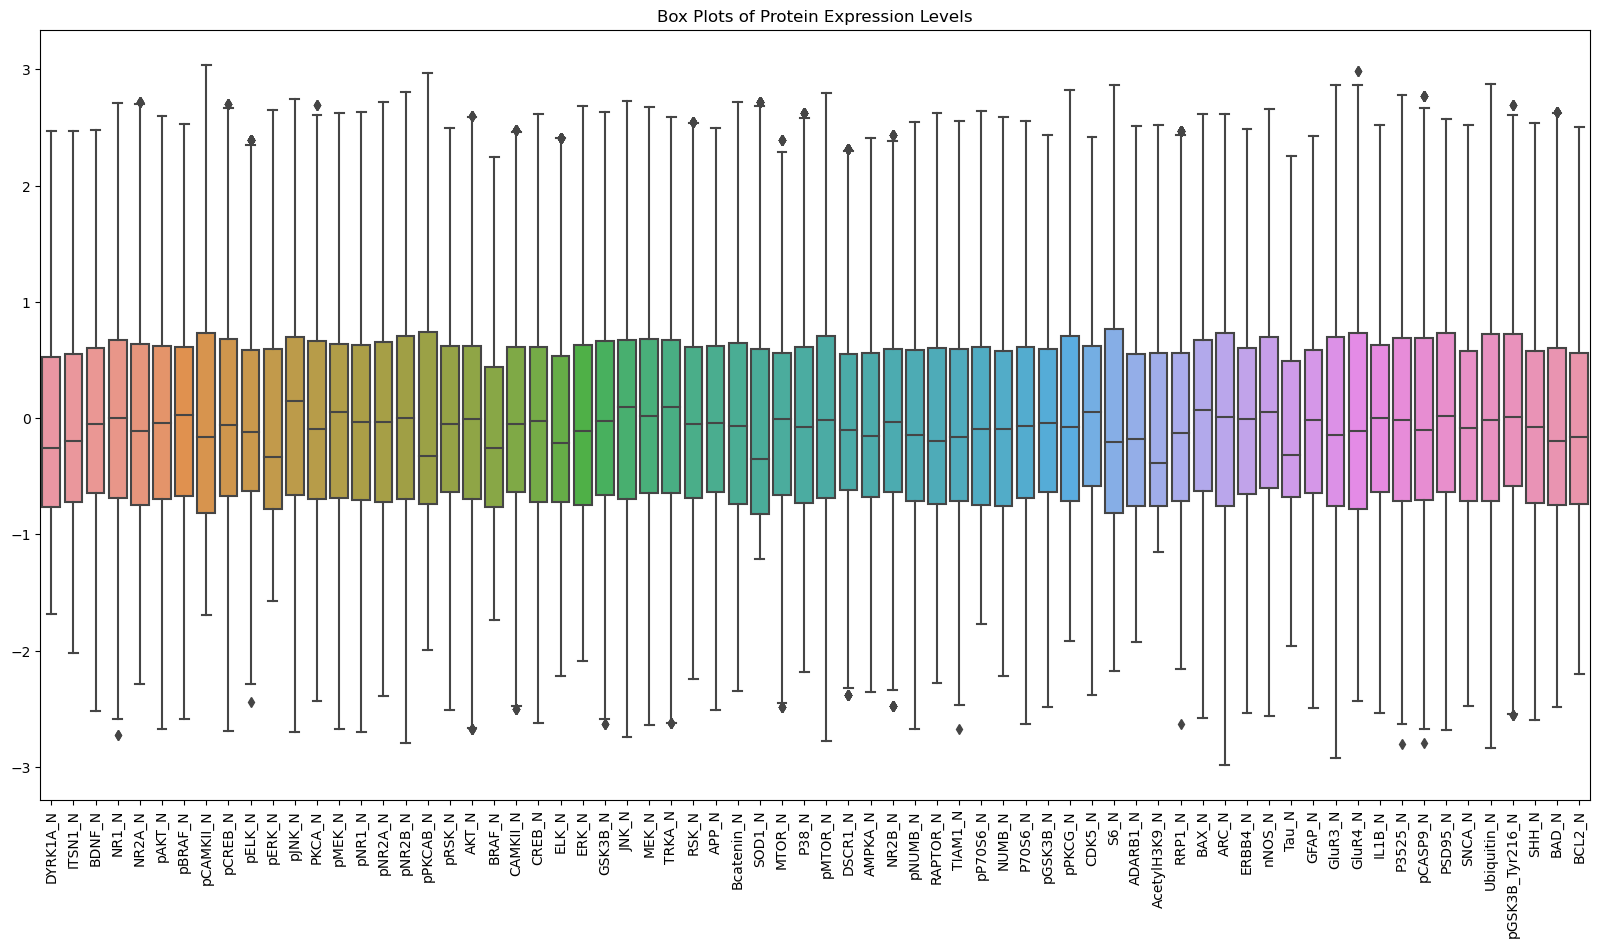

In [31]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.iloc[:,:-15])
plt.xticks(rotation=90)
plt.title('Box Plots of Protein Expression Levels')
plt.show()

Pie Chart

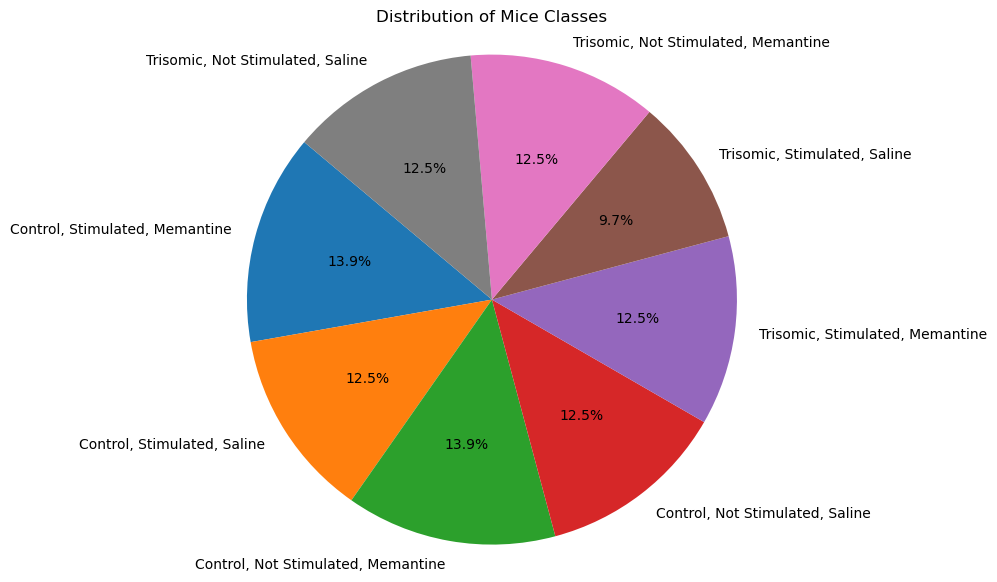

In [32]:
unique_classes = df['class'].unique()
class_counts = df['class'].value_counts()
class_labels = ['Control, Stimulated, Memantine', 'Control, Stimulated, Saline',
                'Control, Not Stimulated, Memantine', 'Control, Not Stimulated, Saline',
                'Trisomic, Stimulated, Memantine', 'Trisomic, Stimulated, Saline',
                'Trisomic, Not Stimulated, Memantine', 'Trisomic, Not Stimulated, Saline']
mapped_class_counts = [class_counts.get(i, 0) for i in range(len(class_labels))]
plt.figure(figsize=(10, 7))
plt.pie(mapped_class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mice Classes')
plt.axis('equal')
plt.show()

Bar plot

Heatmap

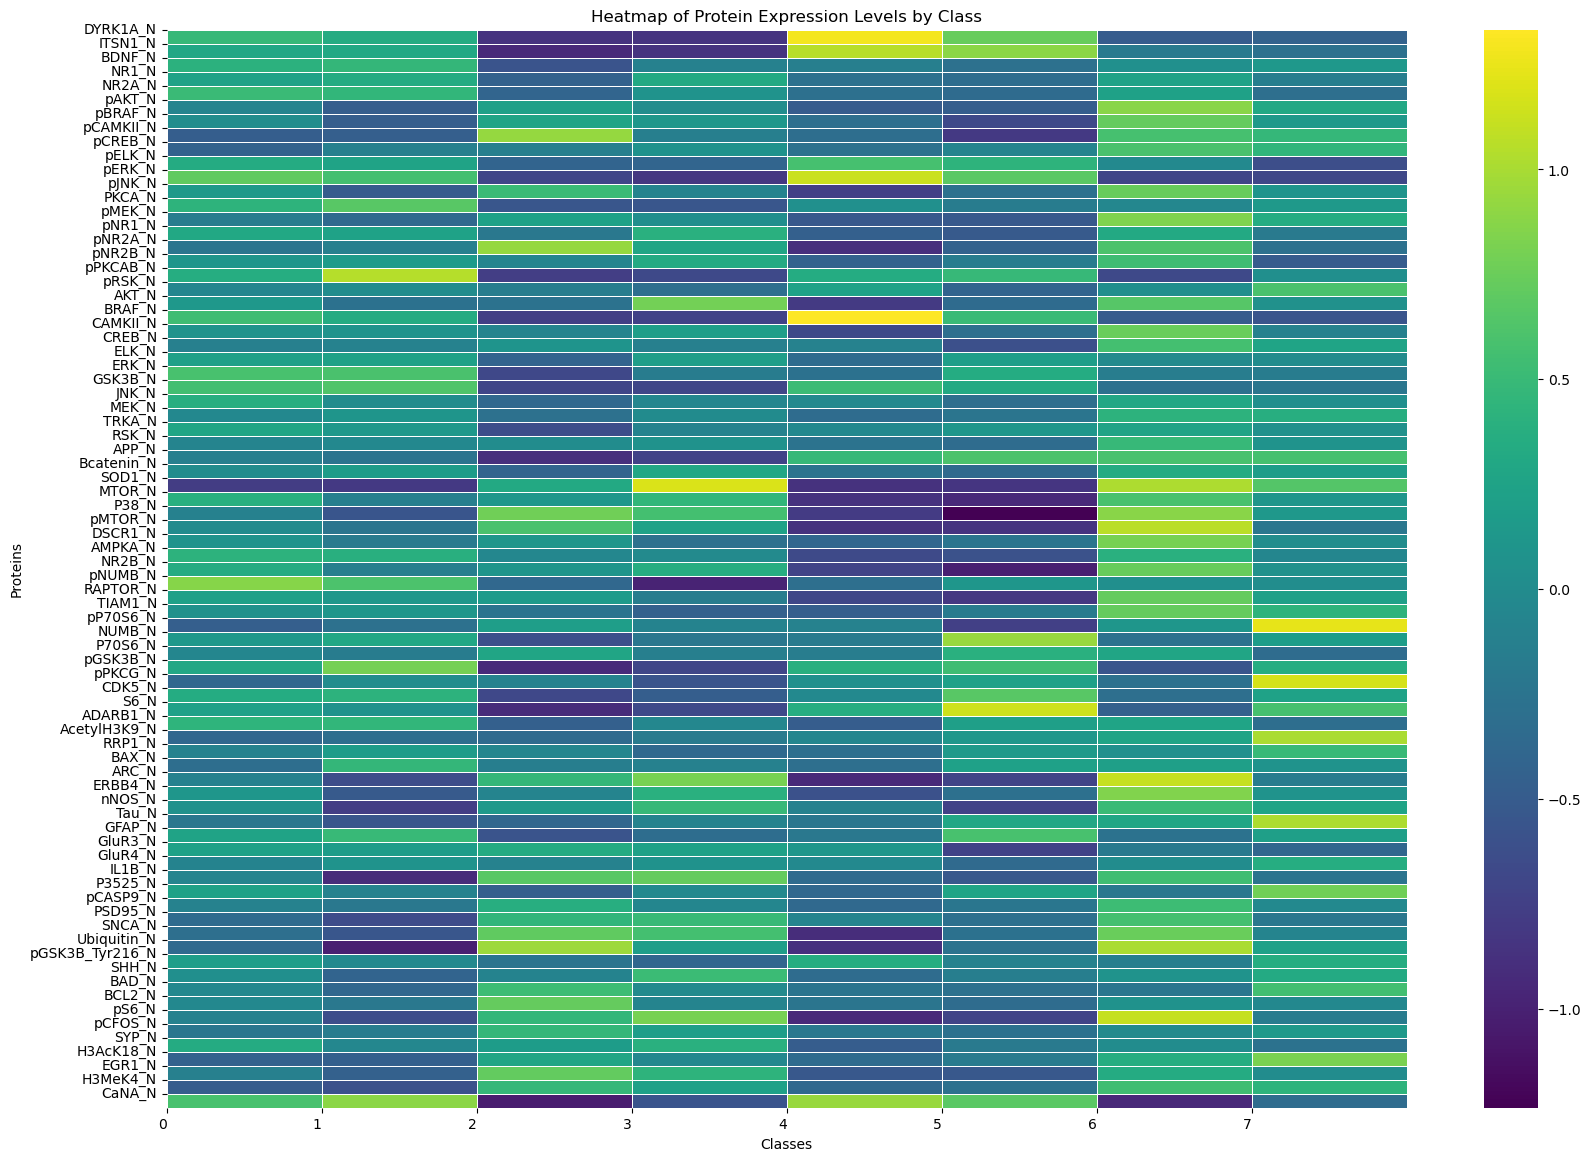

In [33]:
protein_columns = df.columns[:77] 
mean_protein_by_class = df.groupby('class')[protein_columns].mean()

plt.figure(figsize=(20, 14))  
sns.heatmap(mean_protein_by_class.T, cmap='viridis', annot=False, linewidths=0.5)
plt.title('Heatmap of Protein Expression Levels by Class')
plt.xlabel('Classes')
plt.ylabel('Proteins')
plt.xticks(ticks=range(len(mean_protein_by_class.index)), labels=mean_protein_by_class.index, ha='right')  
plt.yticks(ticks=range(len(protein_columns)), labels=protein_columns) 
plt.show()

Correlation Analysis

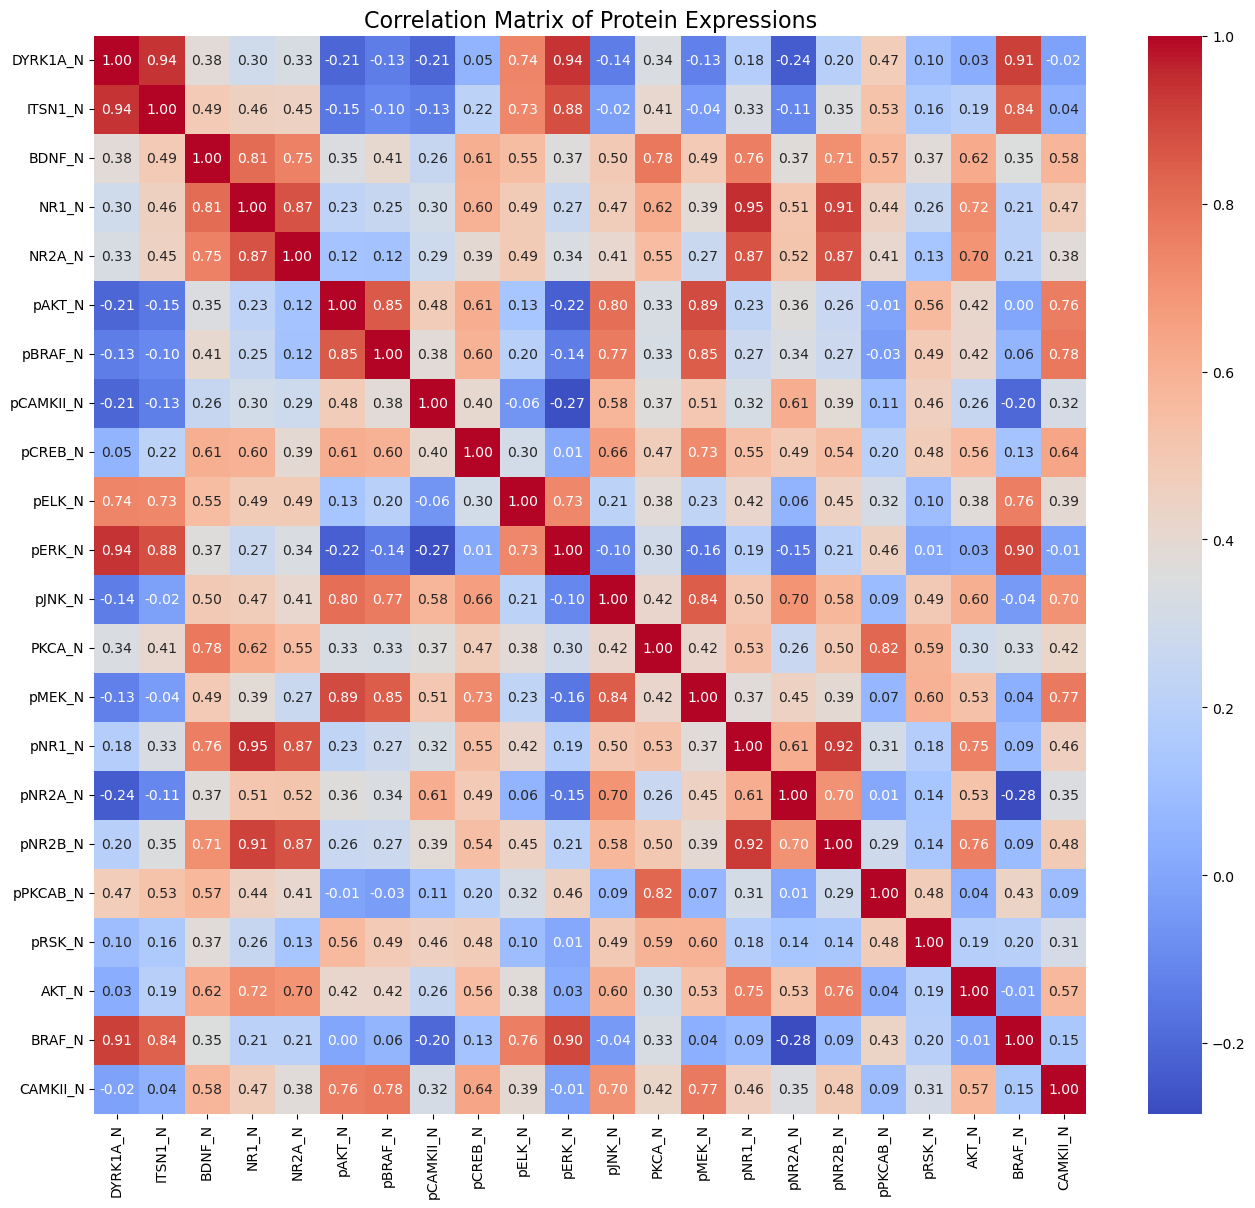

In [34]:
protein_columns = df.columns[0:22]

correlation_matrix = df[protein_columns].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Protein Expressions', fontsize=16)
plt.show()

Outlier detection in numerical columns

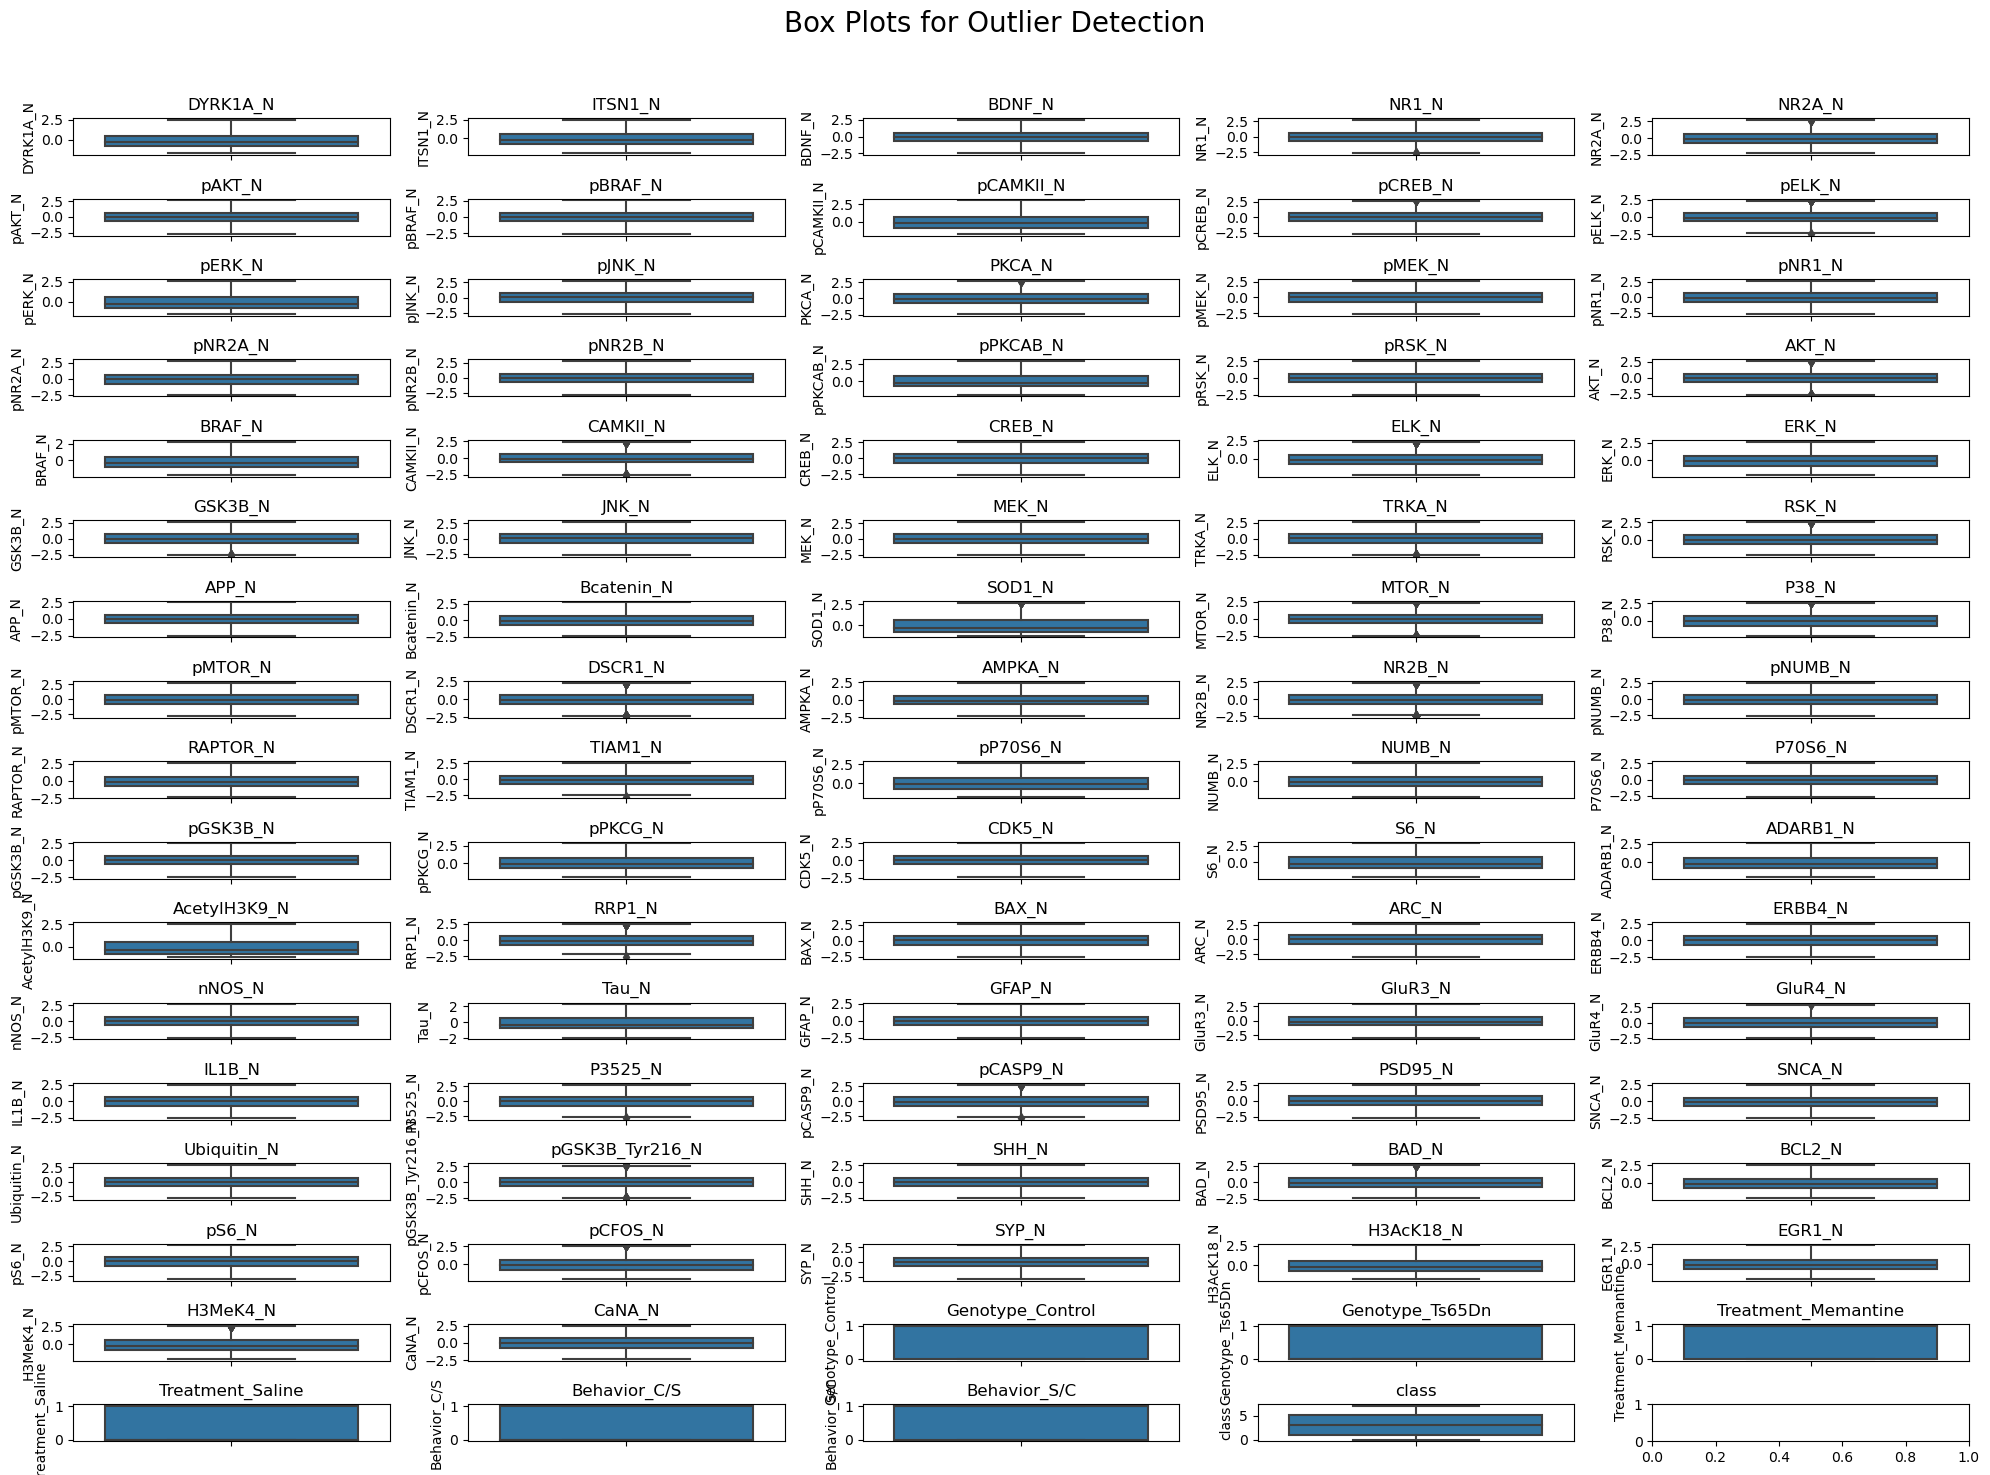

In [35]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_data = df[numeric_columns]
fig, axes = plt.subplots(len(numeric_columns) // 5 + 1, 5, figsize=(20, 15))
fig.suptitle('Box Plots for Outlier Detection', fontsize=20)

for i, col in enumerate(numeric_columns):
    if len(numeric_columns) > 5:
        sns.boxplot(y=df[col], ax=axes[i // 5, i % 5])
        axes[i // 5, i % 5].set_title(col)
    else:
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Distribution of the target variable

Relationship between target variable and numerical variables

C:\Users\sndys\AppData\Local\Temp\ipykernel_17712\2604022488.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 1, 1, 1])


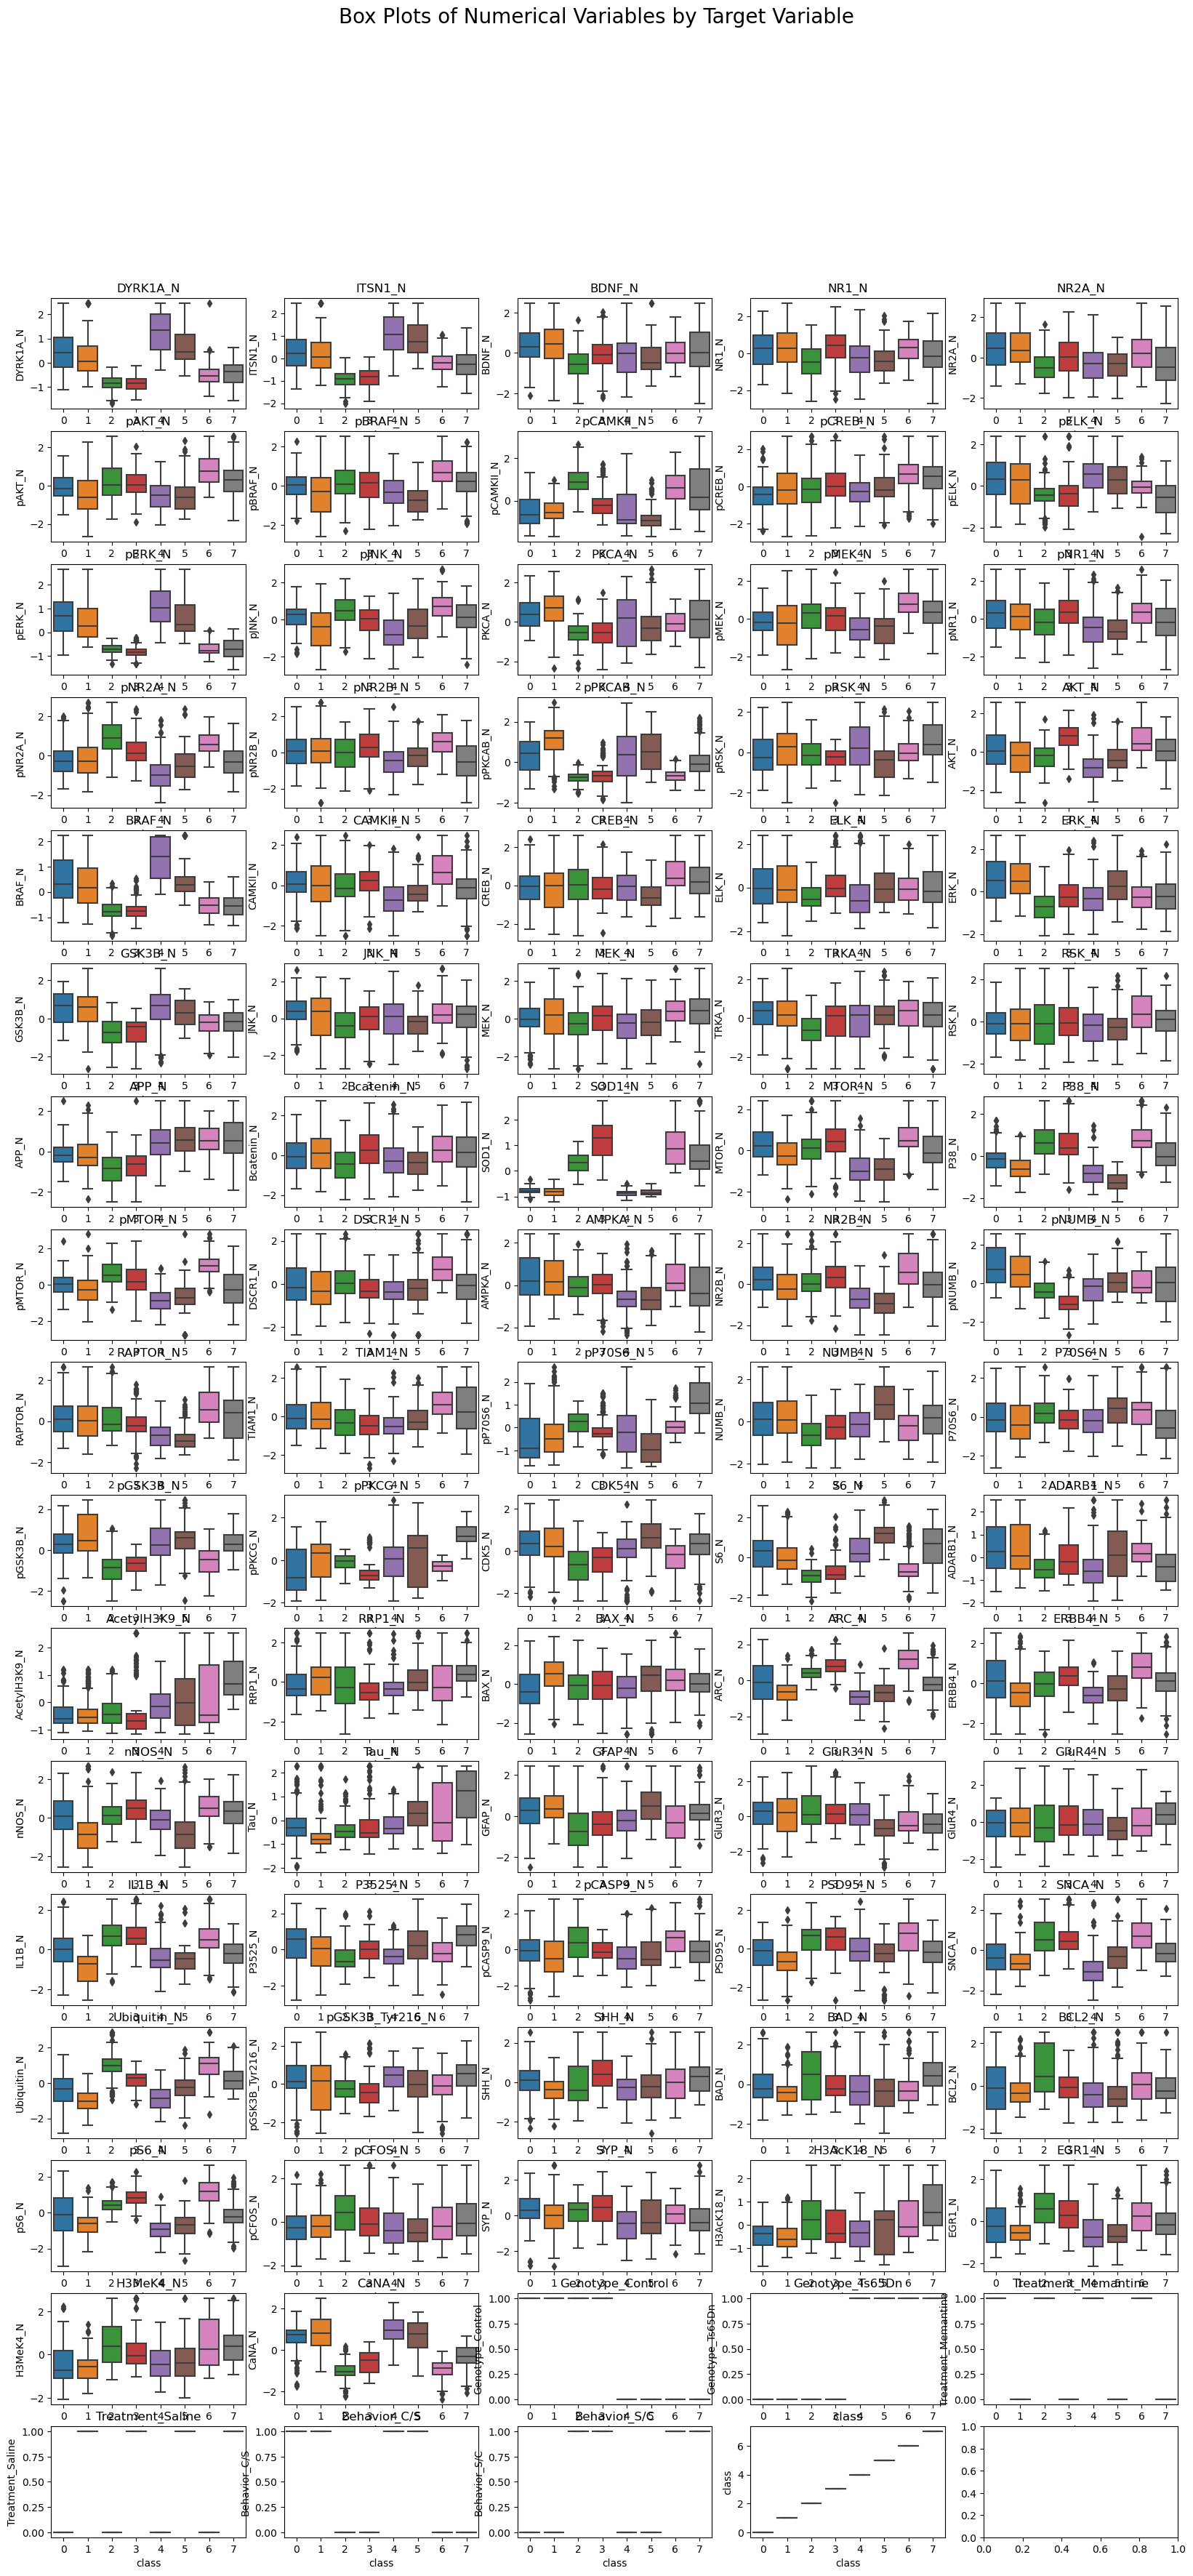

In [36]:
fig, axes = plt.subplots(len(numeric_columns) // 5 + 1, 5, figsize=(20, 40))
fig.suptitle('Box Plots of Numerical Variables by Target Variable', fontsize=20)

for i, col in enumerate(numeric_columns):
    if len(numeric_columns) > 5:
        sns.boxplot(x='class', y=col, data=df, ax=axes[i // 5, i % 5])
        axes[i // 5, i % 5].set_title(col)
    else:
        sns.boxplot(x='class', y=col, data=df, ax=axes[i])
        axes[i].set_title(col)

plt.tight_layout(rect=[1, 1, 1, 1])
plt.show()

# Correlation with independent variable

In [27]:
data=pd.read_csv("Preprocessed_data.csv")
new_data=data.drop(columns=['MouseID']).corr()
new_data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,EGR1_N,H3MeK4_N,CaNA_N,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C,class
DYRK1A_N,1.000000,0.936917,0.381891,0.297374,0.331967,-0.207176,-0.134291,-0.206948,0.052275,0.740359,...,-0.490259,-0.496976,0.559392,-0.232540,0.232540,0.092226,-0.092226,0.683776,-0.683776,-0.114369
ITSN1_N,0.936917,1.000000,0.492309,0.457405,0.452918,-0.149810,-0.103241,-0.129019,0.216513,0.732556,...,-0.567184,-0.541092,0.586202,-0.318028,0.318028,0.039142,-0.039142,0.593948,-0.593948,0.009408
BDNF_N,0.381891,0.492309,1.000000,0.808168,0.753207,0.345699,0.407176,0.257400,0.607563,0.552047,...,-0.239970,-0.317533,0.261173,0.044429,-0.044429,-0.065937,0.065937,0.141481,-0.141481,-0.085059
NR1_N,0.297374,0.457405,0.808168,1.000000,0.873189,0.226855,0.254707,0.303905,0.598108,0.488406,...,-0.353303,-0.411489,0.205917,0.111300,-0.111300,-0.064562,0.064562,0.018366,-0.018366,-0.089870
NR2A_N,0.331967,0.452918,0.753207,0.873189,1.000000,0.124979,0.118838,0.287873,0.393985,0.485193,...,-0.377728,-0.510256,0.188342,0.160296,-0.160296,0.011868,-0.011868,0.111663,-0.111663,-0.188742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Treatment_Memantine,0.092226,0.039142,-0.065937,-0.064562,0.011868,0.132907,0.181774,0.188180,-0.082492,0.114704,...,0.111608,0.041295,-0.125451,-0.003096,0.003096,1.000000,-1.000000,0.029378,-0.029378,-0.225300
Treatment_Saline,-0.092226,-0.039142,0.065937,0.064562,-0.011868,-0.132907,-0.181774,-0.188180,0.082492,-0.114704,...,-0.111608,-0.041295,0.125451,0.003096,-0.003096,-1.000000,1.000000,-0.029378,0.029378,0.225300
Behavior_C/S,0.683776,0.593948,0.141481,0.018366,0.111663,-0.358028,-0.320524,-0.487084,-0.239178,0.381658,...,-0.388103,-0.430894,0.748772,0.029378,-0.029378,0.029378,-0.029378,1.000000,-1.000000,-0.462728
Behavior_S/C,-0.683776,-0.593948,-0.141481,-0.018366,-0.111663,0.358028,0.320524,0.487084,0.239178,-0.381658,...,0.388103,0.430894,-0.748772,-0.029378,0.029378,-0.029378,0.029378,-1.000000,1.000000,0.462728


In [28]:
# Correlation among independent variables
target_columns = [ 'class']
feature_columns = new_data.columns.difference(target_columns)
corr_features = new_data.corr().loc[feature_columns, feature_columns]

print(corr_features)


          ADARB1_N     AKT_N   AMPKA_N     APP_N     ARC_N  AcetylH3K9_N  \
ADARB1_N  1.000000  0.724831  0.697737  0.675755  0.096710     -0.438789   
AKT_N     0.724831  1.000000  0.807923  0.518890  0.528218     -0.409847   
AMPKA_N   0.697737  0.807923  1.000000  0.598687  0.204934     -0.438881   
APP_N     0.675755  0.518890  0.598687  1.000000 -0.296542     -0.146405   
ARC_N     0.096710  0.528218  0.204934 -0.296542  1.000000     -0.108259   
...            ...       ...       ...       ...       ...           ...   
pP70S6_N -0.399531 -0.172373 -0.014662 -0.071299  0.061782      0.575038   
pPKCAB_N  0.655062  0.152924  0.288887  0.730912 -0.618635     -0.159914   
pPKCG_N  -0.175828 -0.393290 -0.430547  0.118101 -0.357111      0.669416   
pRSK_N    0.206795  0.229156  0.210027  0.531191 -0.211812      0.193142   
pS6_N     0.096710  0.528218  0.204934 -0.296542  1.000000     -0.108259   

             BAD_N     BAX_N    BCL2_N    BDNF_N  ...   pMTOR_N    pNR1_N  \
ADARB1_N -


# Correlation with target variable

In [29]:
target_columns = ['class']
feature_columns = new_data.columns.difference(target_columns)
corr_with_target = new_data.corr().loc[feature_columns, target_columns]
print(corr_with_target)

             class
ADARB1_N -0.388905
AKT_N    -0.099815
AMPKA_N  -0.290628
APP_N     0.064701
ARC_N     0.171305
...            ...
pP70S6_N  0.542473
pPKCAB_N -0.342631
pPKCG_N   0.454520
pRSK_N    0.192521
pS6_N     0.171305

[83 rows x 1 columns]


In [30]:
print(new_data.columns)

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype_Control', 'Genotype_Ts65Dn', 'Treatment_Memantine',
       'Treatment_Saline', '

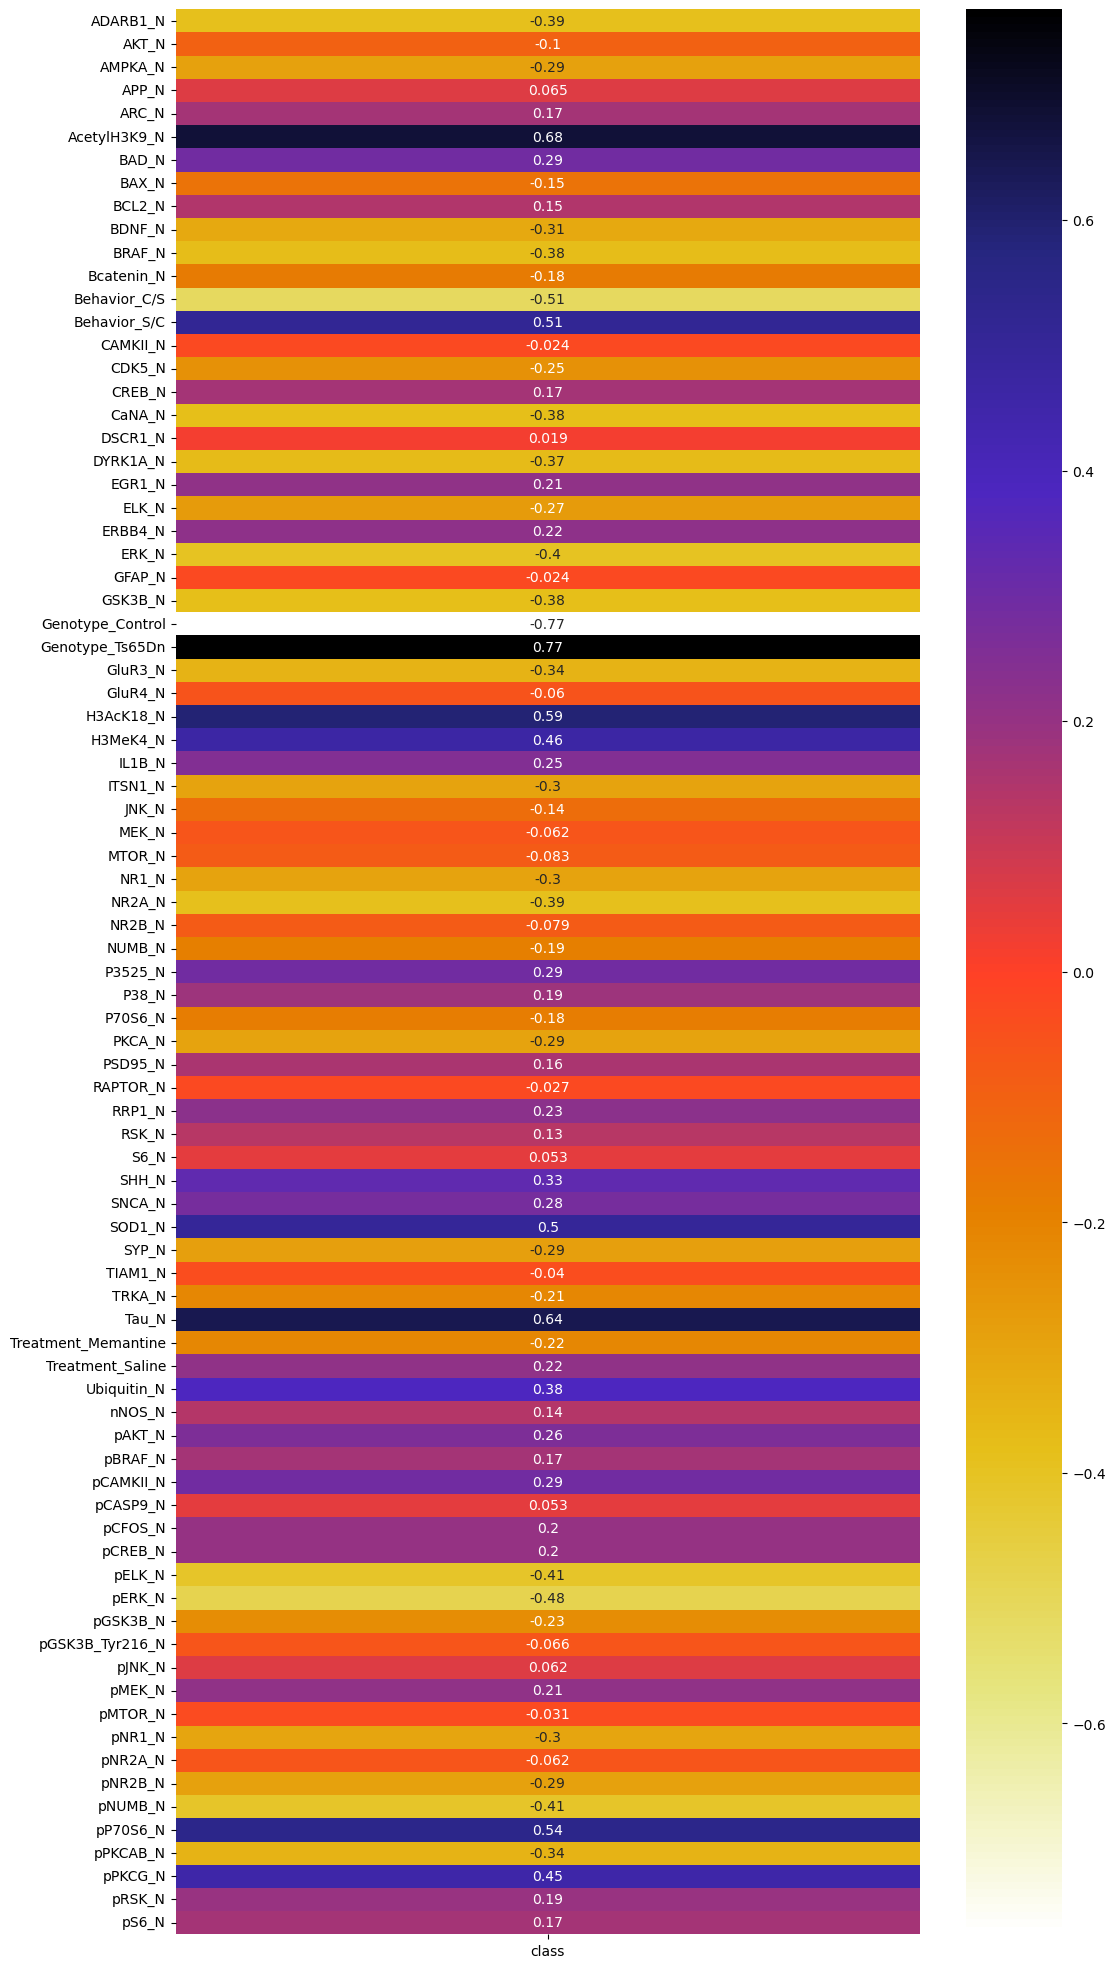

In [31]:
#Correlation of independent variable with target variable with the help of heatmap
plt.figure(figsize=(12,25))
sns.heatmap(corr_with_target, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [32]:
#correlated features of independent variable with independent variable
corr_threshold = 0.9

to_drop = set()
for i in range(len(feature_columns)):
    for j in range(i + 1, len(feature_columns)):
        if abs(corr_features.iloc[i, j]) > corr_threshold:
            to_drop.add(corr_features.columns[j])

print("Features to drop due to high correlation:", to_drop)
len(to_drop)

Features to drop due to high correlation: {'Ubiquitin_N', 'BCL2_N', 'Genotype_Ts65Dn', 'Behavior_S/C', 'CaNA_N', 'pCFOS_N', 'pBRAF_N', 'TIAM1_N', 'SNCA_N', 'RAPTOR_N', 'ELK_N', 'Treatment_Saline', 'GSK3B_N', 'ITSN1_N', 'NR1_N', 'ERK_N', 'pNR2B_N', 'P38_N', 'DYRK1A_N', 'pMEK_N', 'pPKCAB_N', 'H3MeK4_N', 'TRKA_N', 'SOD1_N', 'MEK_N', 'S6_N', 'pMTOR_N', 'pS6_N', 'EGR1_N', 'pERK_N', 'PKCA_N', 'NR2A_N', 'pNR1_N', 'pAKT_N', 'RSK_N', 'pCREB_N', 'NR2B_N'}


37

In [33]:
# Define a threshold for correlation with target
target_corr_threshold = 0.1

selected_features = corr_with_target[(corr_with_target.abs() > target_corr_threshold).any(axis=1)].index

final_features = [f for f in selected_features if f not in to_drop]

print("Selected features based on correlation with target:", final_features)
len(final_features)

Selected features based on correlation with target: ['ADARB1_N', 'AMPKA_N', 'ARC_N', 'AcetylH3K9_N', 'BAD_N', 'BAX_N', 'BDNF_N', 'BRAF_N', 'Bcatenin_N', 'Behavior_C/S', 'CDK5_N', 'CREB_N', 'ERBB4_N', 'Genotype_Control', 'GluR3_N', 'H3AcK18_N', 'IL1B_N', 'JNK_N', 'NUMB_N', 'P3525_N', 'P70S6_N', 'PSD95_N', 'RRP1_N', 'SHH_N', 'SYP_N', 'Tau_N', 'Treatment_Memantine', 'nNOS_N', 'pCAMKII_N', 'pELK_N', 'pGSK3B_N', 'pNUMB_N', 'pP70S6_N', 'pPKCG_N', 'pRSK_N']


35

In [34]:
df = data.drop(to_drop,axis=1)
data = df.drop(columns='MouseID')

In [35]:
# from sklearn.preprocessing import StandardScaler
features = data.columns[:-1] 
x = data[features]
# x_standard = StandardScaler().fit_transform(x)

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(x)

In [37]:
principal_df = pd.DataFrame(data=principal_components, columns= x.columns)

In [38]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

In [39]:
variance_df = pd.DataFrame({'Explained Variance': explained_variance,
    'Cumulative Explained Variance': cumulative_explained_variance
})
print(variance_df.head(20))

    Explained Variance  Cumulative Explained Variance
0             0.222312                       0.222312
1             0.140580                       0.362892
2             0.115988                       0.478880
3             0.096390                       0.575270
4             0.066636                       0.641906
5             0.053892                       0.695798
6             0.041288                       0.737086
7             0.035329                       0.772415
8             0.028388                       0.800804
9             0.020283                       0.821087
10            0.016196                       0.837283
11            0.015014                       0.852297
12            0.014791                       0.867089
13            0.012065                       0.879153
14            0.011356                       0.890509
15            0.010529                       0.901038
16            0.008987                       0.910025
17            0.007417      

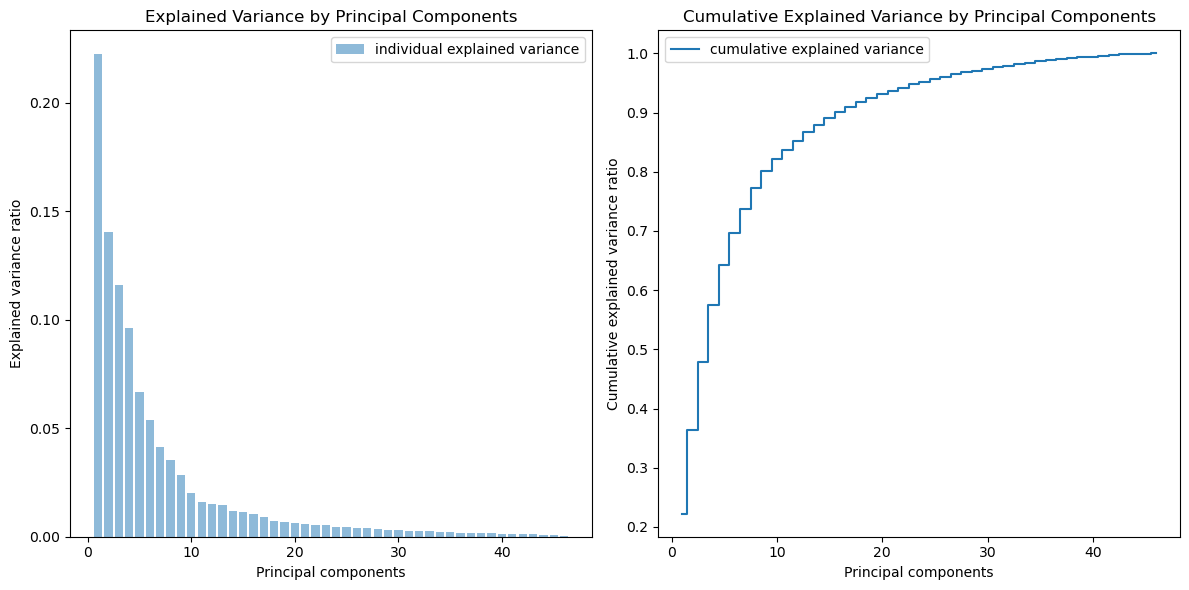

In [40]:
# Plotting the explained variance and cumulative explained variance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend()

plt.subplot(1, 2, 2)
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Principal components')
plt.title('Cumulative Explained Variance by Principal Components')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
n_components = 20 
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(x)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

pca_df['class'] = data['class']
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,class
0,-1.578402,2.859374,-3.698134,0.250972,-0.440635,0.343449,-0.935760,0.028494,0.199678,1.707034,...,-0.709320,-0.713129,-0.647232,-1.207375,-0.449493,1.039558,0.017972,-1.103424,0.470181,0
1,-0.900153,1.710176,-3.502318,0.634829,-0.187010,0.005923,-0.888925,0.052725,0.019782,1.607041,...,-0.783717,-0.911652,-0.396562,-1.617963,-0.476176,1.005760,-0.109904,-1.053563,0.423351,0
2,-0.961211,1.492361,-3.540732,0.806577,-0.319712,-0.220133,-1.035457,-0.195202,-0.007835,1.767933,...,-0.778902,-0.965343,-0.448097,-1.646790,-0.531048,0.754968,0.007730,-1.222448,0.636901,0
3,0.858610,2.627717,-2.368729,0.657478,-0.599668,-0.190573,-1.573823,-0.216542,0.195735,1.608159,...,-0.581556,-0.452227,-0.677850,-1.141541,-0.173131,0.170191,0.668352,-0.900740,0.229735,0
4,1.059484,1.457244,-2.336834,0.881054,-0.593933,-0.671357,-1.642372,0.038345,0.094601,1.586515,...,-0.841131,-0.390243,-0.776743,-1.247246,-0.505791,0.043322,0.349029,-1.033284,0.415605,0


In [42]:
from sklearn.model_selection import train_test_split
X = principal_components
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,r2_score

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [45]:
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)

In [46]:
print("Performance of model")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"R2_Score: {r2_score(y_test, y_pred)}")

Performance of model
Accuracy: 0.9475308641975309
Precision: 0.951679953188038
R2_Score: 0.9331836047164515


In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [48]:
clf = GridSearchCV(knc, parameters, cv = 10)
clf.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [49]:
clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [50]:
knc_best = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, p = 1, weights = 'distance')

In [51]:
knc_best.fit(X_train,y_train)
y_pred_best = knc_best.predict(X_test)

In [52]:
print("Performance of model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(f"Precision: {precision_score(y_test, y_pred_best, average='weighted')}")
print(f"R2_Score: {r2_score(y_test, y_pred_best)}")

Performance of model
Accuracy: 0.9876543209876543
Precision: 0.9879815521511223
R2_Score: 0.9758562605277934


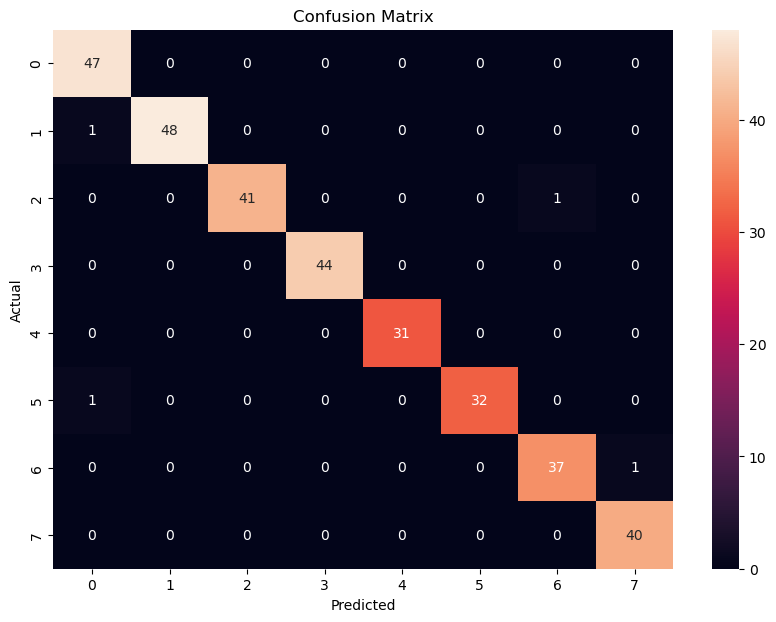

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()